In [3]:
import matplotlib.pyplot as plt
import numpy as np

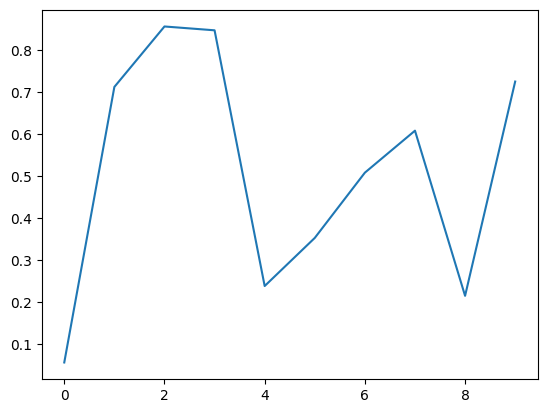

In [83]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
# The FigureCanvasBase.mpl_connect 
# method returns a connection id (an integer), 
# which can be used to disconnect the callback via

fig.canvas.mpl_disconnect(cid)

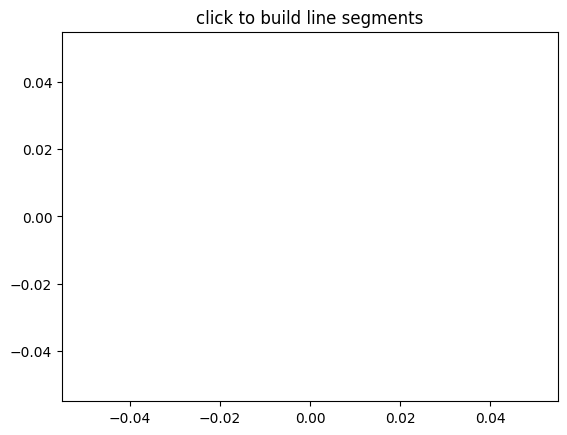

In [86]:
# Event attributes

from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes != self.line.axes:
            return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig, ax = plt.subplots()
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])
linebuilder = LineBuilder(line)

plt.show()

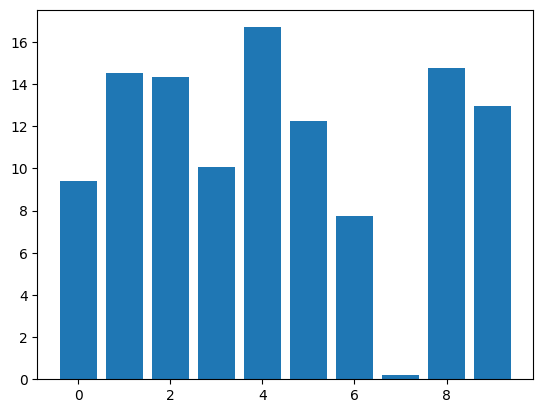

In [88]:
# Draggable rectangle exercise:

import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        """Connect to all events we need."""
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

        
    def on_press(self, event):
        """Check whether mouse is over us; 
        if so, store some data."""
        if event.inaxes != self.rect.axes:
            return
        contains, attrd = self.rect.contains(event)
        if not contains:
            return
        print('event contains', self.rect.xy)
        self.press = self.rect.xy, (event.xdata, event.ydata)

    def on_motion(self, event):
        """Move rectangle if mouse is over us."""
        if self.press is None or event.inaxes != self.rect.axes:
            return
        (x0, y0), (xpress, ypress) = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress

        self.rect.set_x(x0 + dx)
        self.rect.set_y(y0 + dy)

        self.rect.figure.canvas.draw()

    def on_release(self, event):
        """Disconnect all callbacks."""
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig, ax = plt.subplots()
rects = ax.bar(range(10), 20 * np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()